In [185]:
import pandas as pd

def print_stats(df):
    print("Custo por algoritmo:")
    print(df.groupby("algorithm")["cost"].mean())

    print("\nCusto por função de custo:")
    print(df.groupby("cost_id")["cost"].mean())

    print("\nTamanho do caminho por algoritmo:")
    print(df.groupby("algorithm")["path_size"].mean())

    print("\nQuantidade de nós visitados por algoritmo:")
    print(df.groupby("algorithm")["visited_qty"].mean())

    print("\nCusto por algoritmo e função de custo:")
    print(df.groupby(["algorithm", "cost_id"])["cost"].mean())

    print("\nQuantidade de nós visitados por algoritmo e função de custo:")
    print(df.groupby(["algorithm", "cost_id"])["visited_qty"].mean())

    print("\nTamanho do caminho por algoritmo e função de custo:")
    print(df.groupby(["algorithm", "cost_id"])["path_size"].mean())

    print("\nCusto por heurística:")
    print(df.groupby("heuristic_id")["cost"].mean())

    

In [187]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [188]:
# filter df by algorithm
df_filtered = df[df['algorithm'] == 'bfs']
df_filtered.to_csv("res.csv")
df_filtered['start'] = df_filtered['start'].apply(lambda x: [float(i) for i in x.replace("[","").replace("]","").split(' ')])
df_filtered['target'] = df_filtered['target'].apply(lambda x: [float(i) for i in x.replace("[","").replace("]","").split(' ') if i != ''])

# crie um grafico a partir de df_filtered mostrando a relação entre path_size e a distancia entre os pontos start e target
df_filtered['distancia'] = df_filtered.apply(lambda row: haversine(row['start'][0],row['start'][1],
                                                                   row['target'][0],  row['target'][1]), axis=1)

C:\Users\eveli\AppData\Local\Temp\ipykernel_12548\3065419866.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['start'] = df_filtered['start'].apply(lambda x: [float(i) for i in x.replace("[","").replace("]","").split(' ')])
C:\Users\eveli\AppData\Local\Temp\ipykernel_12548\3065419866.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['target'] = df_filtered['target'].apply(lambda x: [float(i) for i in x.replace("[","").replace("]","").split(' ') if i != ''])
C:\Users\eveli\AppDat

In [189]:
df_filtered

,algorithm,visited_qty,generated_qty,path_size,path,start,target,cost_id,heuristic_id,cost,order,pharmacies,distancia
1,bfs,30,47,6,[[7 6][7 5][7 4][7 3][8 3][9 3]],"[9.0, 3.0]","[7.0, 6.0]",0,-1,50,[0 1 2 3],[],400.524821
4,bfs,30,47,6,[[7 6][7 5][7 4][7 3][8 3][9 3]],"[9.0, 3.0]","[7.0, 6.0]",1,-1,65,[0 1 2 3],[],400.524821
7,bfs,30,47,6,[[7 6][7 5][7 4][7 3][8 3][9 3]],"[9.0, 3.0]","[7.0, 6.0]",2,-1,53,[0 1 2 3],[],400.524821
10,bfs,30,47,6,[[7 6][7 5][7 4][7 3][8 3][9 3]],"[9.0, 3.0]","[7.0, 6.0]",3,-1,53,[0 1 2 3],[],400.524821
13,bfs,574,619,20,[[29 25][29 24][29 23][29 22][29 21][29 20][29...,"[21.0, 14.0]","[29.0, 25.0]",0,-1,190,[0 1 2 3],[],1481.930788
...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,bfs,478,513,21,[[28 8][28 9][28 10][28 11][28 12][28 13][28 1...,"[23.0, 23.0]","[28.0, 8.0]",3,-1,210,[0 1 2 3],[],1751.275969
589,bfs,908,920,35,[[4 4][4 5][4 6][4 7][4 8][4 9][4 10][4 11][4 ...,"[19.0, 23.0]","[4.0, 4.0]",0,-1,340,[0 1 2 3],[],2657.942691
592,bfs,908,920,35,[[4 4][4 5][4 6][4 7][4 8][4 9][4 10][4 11][4 ...,"[19.0, 23.0]","[4.0, 4.0]",1,-1,340,[0 1 2 3],[],2657.942691
595,bfs,908,920,35,[[4 4][4 5][4 6][4 7][4 8][4 9][4 10][4 11][4 ...,"[19.0, 23.0]","[4.0, 4.0]",2,-1,340,[0 1 2 3],[],2657.942691


In [190]:
a=["","4"]
a.remove("")
a

['4']

<Axes: xlabel='cost_id', ylabel='cost'>

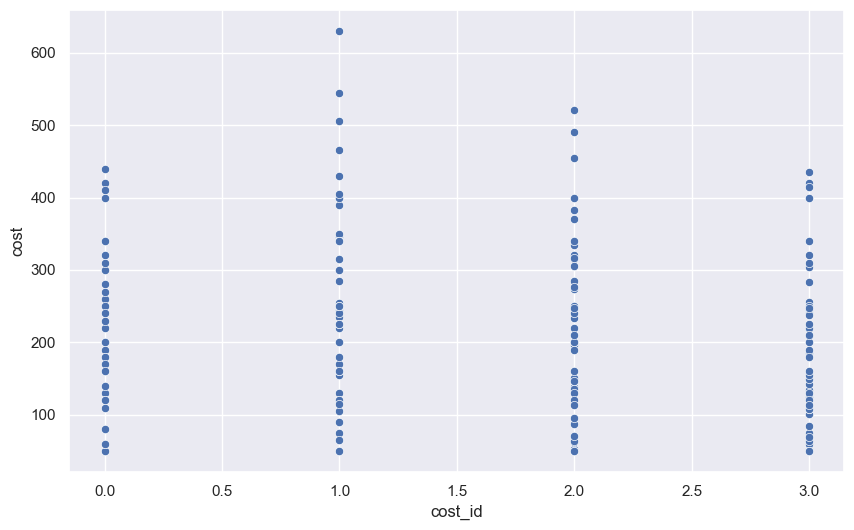

In [191]:
#convert start to int list


import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cost_id', y='cost', data=df_filtered)


In [192]:
df_filtered

,algorithm,visited_qty,generated_qty,path_size,path,start,target,cost_id,heuristic_id,cost,order,pharmacies,distancia
1,bfs,30,47,6,[[7 6][7 5][7 4][7 3][8 3][9 3]],"[9.0, 3.0]","[7.0, 6.0]",0,-1,50,[0 1 2 3],[],400.524821
4,bfs,30,47,6,[[7 6][7 5][7 4][7 3][8 3][9 3]],"[9.0, 3.0]","[7.0, 6.0]",1,-1,65,[0 1 2 3],[],400.524821
7,bfs,30,47,6,[[7 6][7 5][7 4][7 3][8 3][9 3]],"[9.0, 3.0]","[7.0, 6.0]",2,-1,53,[0 1 2 3],[],400.524821
10,bfs,30,47,6,[[7 6][7 5][7 4][7 3][8 3][9 3]],"[9.0, 3.0]","[7.0, 6.0]",3,-1,53,[0 1 2 3],[],400.524821
13,bfs,574,619,20,[[29 25][29 24][29 23][29 22][29 21][29 20][29...,"[21.0, 14.0]","[29.0, 25.0]",0,-1,190,[0 1 2 3],[],1481.930788
...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,bfs,478,513,21,[[28 8][28 9][28 10][28 11][28 12][28 13][28 1...,"[23.0, 23.0]","[28.0, 8.0]",3,-1,210,[0 1 2 3],[],1751.275969
589,bfs,908,920,35,[[4 4][4 5][4 6][4 7][4 8][4 9][4 10][4 11][4 ...,"[19.0, 23.0]","[4.0, 4.0]",0,-1,340,[0 1 2 3],[],2657.942691
592,bfs,908,920,35,[[4 4][4 5][4 6][4 7][4 8][4 9][4 10][4 11][4 ...,"[19.0, 23.0]","[4.0, 4.0]",1,-1,340,[0 1 2 3],[],2657.942691
595,bfs,908,920,35,[[4 4][4 5][4 6][4 7][4 8][4 9][4 10][4 11][4 ...,"[19.0, 23.0]","[4.0, 4.0]",2,-1,340,[0 1 2 3],[],2657.942691


In [193]:
df = pd.read_csv("log2.csv")
print_stats(df)

Custo por algoritmo:
algorithm
a_star      197.0675
dijkstra    195.3650
Name: cost, dtype: float64

Custo por função de custo:
cost_id
0    179.00
1    233.60
2    202.76
3    170.64
Name: cost, dtype: float64

Tamanho do caminho por algoritmo:
algorithm
a_star      18.9
dijkstra    18.9
Name: path_size, dtype: float64

Quantidade de nós visitados por algoritmo:
algorithm
a_star      118.0125
dijkstra    453.9500
Name: visited_qty, dtype: float64

Custo por algoritmo e função de custo:
algorithm  cost_id
a_star     0          179.00
           1          233.60
           2          203.79
           3          171.88
dijkstra   0          179.00
           1          233.60
           2          200.70
           3          168.16
Name: cost, dtype: float64

Quantidade de nós visitados por algoritmo e função de custo:
algorithm  cost_id
a_star     0          109.16
           1          163.32
           2          127.76
           3           71.81
dijkstra   0          401.44
    

In [194]:
df = pd.read_csv("log3.csv")
print_stats(df)

Custo por algoritmo:
algorithm
a_star           206.3325
greedy_search    213.3125
Name: cost, dtype: float64

Custo por função de custo:
cost_id
0    193.80
1    242.25
2    215.76
3    187.48
Name: cost, dtype: float64

Tamanho do caminho por algoritmo:
algorithm
a_star           20.38
greedy_search    20.38
Name: path_size, dtype: float64

Quantidade de nós visitados por algoritmo:
algorithm
a_star           123.005
greedy_search     20.380
Name: visited_qty, dtype: float64

Custo por algoritmo e função de custo:
algorithm      cost_id
a_star         0          193.80
               1          234.70
               2          211.34
               3          185.49
greedy_search  0          193.80
               1          249.80
               2          220.18
               3          189.47
Name: cost, dtype: float64

Quantidade de nós visitados por algoritmo e função de custo:
algorithm      cost_id
a_star         0          120.20
               1          162.90
             

In [ ]:
df = pd.read_csv("log4.csv")
print_stats(df)

Custo por algoritmo:
algorithm
bfs     229.0625
dfs    2057.8750
Name: cost, dtype: float64

Custo por função de custo:
cost_id
0    1044.500
1    1313.750
2    1178.075
3    1037.550
Name: cost, dtype: float64

Tamanho do caminho por algoritmo:
algorithm
bfs     21.85
dfs    189.05
Name: path_size, dtype: float64

Quantidade de nós visitados por algoritmo:
algorithm
bfs    468.75
dfs    266.15
Name: visited_qty, dtype: float64

Custo por algoritmo e função de custo:
algorithm  cost_id
bfs        0           208.50
           1           268.75
           2           237.25
           3           201.75
dfs        0          1880.50
           1          2358.75
           2          2118.90
           3          1873.35
Name: cost, dtype: float64

Quantidade de nós visitados por algoritmo e função de custo:
algorithm  cost_id
bfs        0          468.75
           1          468.75
           2          468.75
           3          468.75
dfs        0          266.15
           1    

In [249]:
df = pd.read_csv("log5.csv")
df['start'] = df['start'].apply(lambda x: [float(i) for i in x.replace("[","").replace("]","").split(' ') if i != ''])
df['target'] = df['target'].apply(lambda x: [float(i) for i in x.replace("[","").replace("]","").split(' ') if i != ''])
df['pharmacies'] = df['pharmacies'].apply(lambda x: [i for i in x.split('] [') if i != ''])
df['pharmacies'] = df['pharmacies'].apply(lambda x: [[float(i) for i in pharmacy.replace("[","").replace("]","").split(' ') if i != ''] for pharmacy in x])
df["pharmacy_start_distances"] = df.apply(lambda row: [haversine(row['start'][0],row['start'][1],pharmacy[0],pharmacy[1]) for pharmacy in row['pharmacies']], axis=1)
df['pharmacy_target_distances'] = df.apply(lambda row: [haversine(row['target'][0],row['target'][1],pharmacy[0],pharmacy[1]) for pharmacy in row['pharmacies']], axis=1)
df['pharmacy_start_min'] = df['pharmacy_start_distances'].apply(lambda x: min(x))
df['pharmacy_target_min'] = df['pharmacy_target_distances'].apply(lambda x: min(x))
df['pharmacy_path'] = df['pharmacy_start_min'] + df['pharmacy_target_min']

print_stats(df)


Custo por algoritmo:
algorithm
a_star    293.55
Name: cost, dtype: float64

Custo por função de custo:
cost_id
0    275.20
1    332.20
2    301.58
3    265.22
Name: cost, dtype: float64

Tamanho do caminho por algoritmo:
algorithm
a_star    28.58
Name: path_size, dtype: float64

Quantidade de nós visitados por algoritmo:
algorithm
a_star    424.075
Name: visited_qty, dtype: float64

Custo por algoritmo e função de custo:
algorithm  cost_id
a_star     0          275.20
           1          332.20
           2          301.58
           3          265.22
Name: cost, dtype: float64

Quantidade de nós visitados por algoritmo e função de custo:
algorithm  cost_id
a_star     0          396.12
           1          537.34
           2          442.20
           3          320.64
Name: visited_qty, dtype: float64

Tamanho do caminho por algoritmo e função de custo:
algorithm  cost_id
a_star     0          28.52
           1          28.52
           2          28.60
           3          28.6

<Axes: xlabel='pharmacy_path', ylabel='cost'>

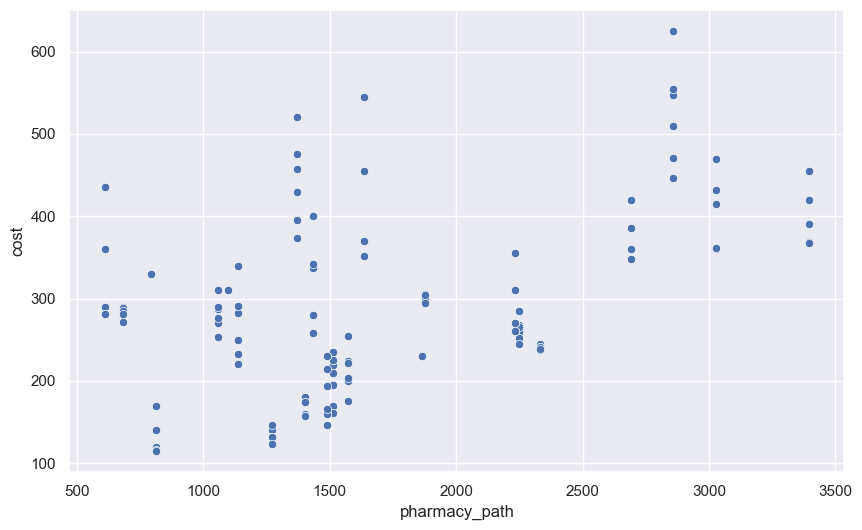

In [239]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pharmacy_path', y='cost', data=df)